In [69]:
%matplotlib inline
from torch import nn
from IPython import display
from torch.utils.data import TensorDataset, DataLoader
import torchvision
import torch
import torchvision.transforms as transforms
import gzip
import numpy as np
import os
import matplotlib.pyplot as plt

display.set_matplotlib_formats("svg")

## 附录. FashionMNIST数据集

下面，我们通过torchvision的`torchvision.datasets`来下载这个数据集。第一次调用时会自动从网上获取数据。我们通过参数`train`来指定获取训练数据集或测试数据集（testing data set）。测试数据集也叫测试集（testing set），只用来评价模型的表现，并不用来训练模型。

另外我们还指定了参数`transform = transforms.ToTensor()`使所有数据转换为`Tensor`，如果不进行转换则返回的是PIL图片。`transforms.ToTensor()`将尺寸为 (H x W x C) 且数据位于[0, 255]的PIL图片或者数据类型为`np.uint8`的NumPy数组转换为尺寸为(C x H x W)且数据类型为`torch.float32`且位于[0.0, 1.0]的`Tensor`。
> 注意： 由于像素值为0到255的整数，所以刚好是uint8所能表示的范围，包括`transforms.ToTensor()`在内的一些关于图片的函数就默认输入的是uint8型，若不是，可能不会报错但可能得不到想要的结果。所以，**如果用像素值(0-255整数)表示图片数据，那么一律将其类型设置成uint8，避免不必要的bug。** 

- 第一次读取将下载`FashionMNIST`数据集
```python
# 下载太慢了！！！！！！中途老停止！！！手动加载吧
mnist_train = torchvision.datasets.FashionMNIST(root='../dataset/fashion_mnist', train=True, transform=transforms.ToTensor())
mnist_test = torchvision.datasets.FashionMNIST(root='../dataset/fashion_mnist', train=False, transform=transforms.ToTensor())
```

In [79]:
def load_mnist(path, kind='train'):
    """
    Load MNIST data from `path`
    """
    labels_path = os.path.join(path, '%s-labels-idx1-ubyte.gz'% kind)
    images_path = os.path.join(path, '%s-images-idx3-ubyte.gz'% kind)

    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8, offset=8)

    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8, offset=16).reshape(len(labels), 784)
    
    features = transforms.ToTensor()(images)  # (h, w, c) -> (c, h, w)
    labels = torch.FloatTensor(labels)

    return features, labels

In [80]:
def load_minibatch_data(batch_size, mnist=False, path="../dataset/"):
    """
    Prepare mini batch data for training
    """
    if mnist:
        c_path = path + 'mnist/'
    else:
        c_path = path + 'fashion_mnist/'
        
    features, labels = load_mnist(c_path, kind='train')
    train_dataset = TensorDataset(features[0], labels)
    train_iter = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
    
    test_features, test_labels = load_mnist(c_path, kind='t10k')
    test_dataset = TensorDataset(test_features[0], test_labels)
    test_iter = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=True)
    return train_iter, test_iter

In [82]:
batch_size = 256
train_iter, test_iter = load_minibatch_data(batch_size)

In [83]:
for x, y in train_iter:
    print(x.shape, y)
    break

torch.Size([256, 784]) tensor([3., 9., 6., 0., 2., 2., 1., 9., 8., 5., 0., 0., 3., 6., 5., 8., 4., 9.,
        2., 7., 8., 8., 2., 9., 1., 4., 2., 6., 1., 4., 3., 2., 5., 6., 8., 1.,
        9., 1., 0., 1., 3., 9., 0., 9., 2., 7., 1., 2., 8., 6., 5., 8., 7., 1.,
        9., 7., 1., 4., 7., 0., 4., 4., 6., 9., 9., 0., 2., 8., 2., 8., 5., 1.,
        5., 8., 2., 5., 7., 8., 2., 9., 2., 6., 4., 0., 9., 8., 3., 7., 7., 8.,
        5., 8., 1., 3., 9., 9., 8., 7., 6., 0., 7., 4., 6., 1., 8., 5., 0., 5.,
        0., 1., 6., 1., 9., 4., 3., 0., 9., 3., 8., 6., 0., 2., 0., 2., 1., 5.,
        8., 3., 4., 3., 7., 9., 2., 4., 2., 2., 6., 3., 1., 6., 8., 1., 4., 6.,
        4., 5., 9., 5., 6., 2., 5., 3., 2., 3., 4., 0., 5., 9., 2., 8., 0., 1.,
        6., 2., 6., 1., 4., 6., 3., 1., 0., 9., 7., 9., 7., 9., 9., 5., 2., 7.,
        3., 8., 8., 9., 2., 0., 5., 2., 4., 4., 3., 8., 3., 4., 5., 2., 3., 7.,
        1., 5., 8., 9., 6., 4., 1., 7., 5., 9., 7., 4., 2., 7., 0., 9., 1., 1.,
        6., 6., 5

In [43]:
label_names = ['短袖圆领T恤', '裤子', '套衫', '连衣裙', '外套', '凉鞋', '衬衫', '运动鞋','包', '短靴']
text_labels = ['t-shirt', 'trouser', 'pullover', 'dress', 'coat', 'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']

裤子


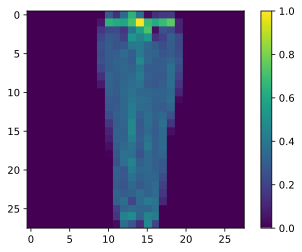

In [84]:
i = 6
x_i = x[i].reshape(28, 28).numpy()
print(class_names[y[i].int()])
plt.figure()
plt.imshow(x_i)
plt.colorbar()
plt.grid(False)

- 训练集

上面的`mnist_train`和`mnist_test`都是[`torch.utils.data.Dataset`](https://pytorch.org/docs/stable/data.html)的子类，所以我们可以用`len()`来获取该数据集的大小，还可以用下标来获取具体的一个样本。训练集中和测试集中的每个类别的图像数分别为6,000和1,000。因为有10个类别，所以训练集和测试集的样本数分别为60,000和10,000。

In [47]:
features = transforms.ToTensor()(X_train)

In [48]:
labels = torch.FloatTensor(y_train)

In [34]:
features.shape

torch.Size([1, 60000, 784])

In [ ]:
dataset = TensorDataset(features, labels)
data_iter = DataLoader(dataset=dataset, batch_size=batch_size, shuffle=True)

- 测试集

In [42]:
test_feature = transforms.ToTensor()(X_test)
test_label = torch.FloatTensor(y_train)

我们可以通过下标来访问任意一个样本:

In [ ]:
feature, label = mnist_train[0]
print(feature.shape, label)  # Channel x Height x Width

变量`feature`对应高和宽均为28像素的图像。由于我们使用了`transforms.ToTensor()`，所以每个像素的数值为[0.0, 1.0]的32位浮点数。需要注意的是，`feature`的尺寸是 (C x H x W) 的，而不是 (H x W x C)。第一维是通道数，因为数据集中是灰度图像，所以通道数为1。后面两维分别是图像的高和宽。

Fashion-MNIST中一共包括了10个类别，分别为`t-shirt（T恤）、trouser（裤子）、pullover（套衫）、dress（连衣裙）、coat（外套）、sandal（凉鞋）、shirt（衬衫）、sneaker（运动鞋）、bag（包）和ankle boot（短靴）`。以下函数可以将数值标签转成相应的文本标签。

In [ ]:
# 本函数已保存在d2lzh包中方便以后使用
def get_fashion_mnist_labels(labels):
    text_labels = ['t-shirt', 'trouser', 'pullover', 'dress', 'coat',
                   'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']
    return [text_labels[int(i)] for i in labels]

下面定义一个可以在一行里画出多张图像和对应标签的函数。

In [ ]:
# 本函数已保存在d2lzh包中方便以后使用
def show_fashion_mnist(images, labels):
    d2l.use_svg_display()
    # 这里的_表示我们忽略（不使用）的变量
    _, figs = plt.subplots(1, len(images), figsize=(12, 12))
    for f, img, lbl in zip(figs, images, labels):
        f.imshow(img.view((28, 28)).numpy())
        f.set_title(lbl)
        f.axes.get_xaxis().set_visible(False)
        f.axes.get_yaxis().set_visible(False)
    plt.show()

现在，我们看一下训练数据集中前10个样本的图像内容和文本标签。

In [ ]:
X, y = [], []
for i in range(10):
    X.append(mnist_train[i][0])
    y.append(mnist_train[i][1])
show_fashion_mnist(X, get_fashion_mnist_labels(y))

- 读取小批量

我们将在训练数据集上训练模型，并将训练好的模型在测试数据集上评价模型的表现。前面说过，`mnist_train`是`torch.utils.data.Dataset`的子类，所以我们可以将其传入`torch.utils.data.DataLoader`来创建一个读取小批量数据样本的DataLoader实例。

在实践中，数据读取经常是训练的性能瓶颈，特别当模型较简单或者计算硬件性能较高时。PyTorch的`DataLoader`中一个很方便的功能是允许使用多进程来加速数据读取。这里我们通过参数`num_workers`来设置4个进程读取数据。

In [ ]:
batch_size = 256
if sys.platform.startswith('win'):
    num_workers = 0  # 0表示不用额外的进程来加速读取数据
else:
    num_workers = 4
train_iter = torch.utils.data.DataLoader(mnist_train, batch_size=batch_size, shuffle=True, num_workers=num_workers)
test_iter = torch.utils.data.DataLoader(mnist_test, batch_size=batch_size, shuffle=False, num_workers=num_workers)

我们将获取并读取Fashion-MNIST数据集的逻辑封装在`d2lzh_pytorch.load_data_fashion_mnist`函数中供后面章节调用。该函数将返回`train_iter`和`test_iter`两个变量。随着本书内容的不断深入，我们会进一步改进该函数。它的完整实现将在5.6节中描述。

最后我们查看读取一遍训练数据需要的时间。

In [ ]:
start = time.perf_counter()
for X, y in train_iter:
    continue
print('%.2f sec' % (time.perf_counter() - start))